# Predict person having **Heart Disease or not** ?

#### Dataset description
1. <b>age</b>: The person's age in years
2. <b>sex</b>: The person's sex (1 = male, 0 = female)
3. <b>cp</b>: The chest pain experienced 
       Value 1: typical angina, 
       Value 2: atypical angina, 
       Value 3: non-anginal pain, 
       Value 4: asymptomatic
4. <b>trestbps</b>: The person's resting blood pressure (mm Hg on admission to the hospital)
5. <b>chol</b>: The person's cholesterol measurement in mg/dl
6. <b>fbs</b>: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. <b>restecg</b>: Resting electrocardiographic measurement.
        0 = normal, 
        1 = having ST-T wave abnormality, 
        2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
8. <b>thalach</b>: The person's maximum heart rate achieved
9. <b>exang</b>: Exercise induced angina (1 = yes; 0 = no)
10. <b>oldpeak</b>: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
11. <b>slope</b>: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. <b>ca</b>: The number of major vessels (0-3)
13. <b>thal</b>: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. <b>target</b>: Heart disease (0 = no, 1 = yes)

In [12]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# displaying all features and records
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
# read the dataset and see the top 5 records
heart_data=pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

In [26]:
# change the name of the columns 
heart_data.rename(columns={'age':'Age',
                           'sex':'Sex',
                           'cp':'Chest Pain Type',
                           'trestbps':'resting Blood Pressure',
                           'chol':'Cholesterol',
                           'fbs':'Fasting Blood Sugar',
                           'restecg':'ECG',
                           'thalach':'Max heart_rate',
                           'exang':'Exercise induced angina',
                           'ca':'No.of Blood vessels',
                           'thal':'Thalassemia'})

,Age,Sex,Chest Pain Type,resting Blood Pressure,Cholesterol,Fasting Blood Sugar,ECG,Max heart_rate,Exercise induced angina,oldpeak,slope,No.of Blood vessels,Thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [27]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [25]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# check how many have heart disease or not
print("Heart Disease People     : ", heart_data['target'].value_counts()[1])
print("Not Heart Disease People : ", heart_data['target'].value_counts()[0])

Heart Disease People     :  165
Not Heart Disease People :  138


In [8]:
# check unique values in each feature
heart_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

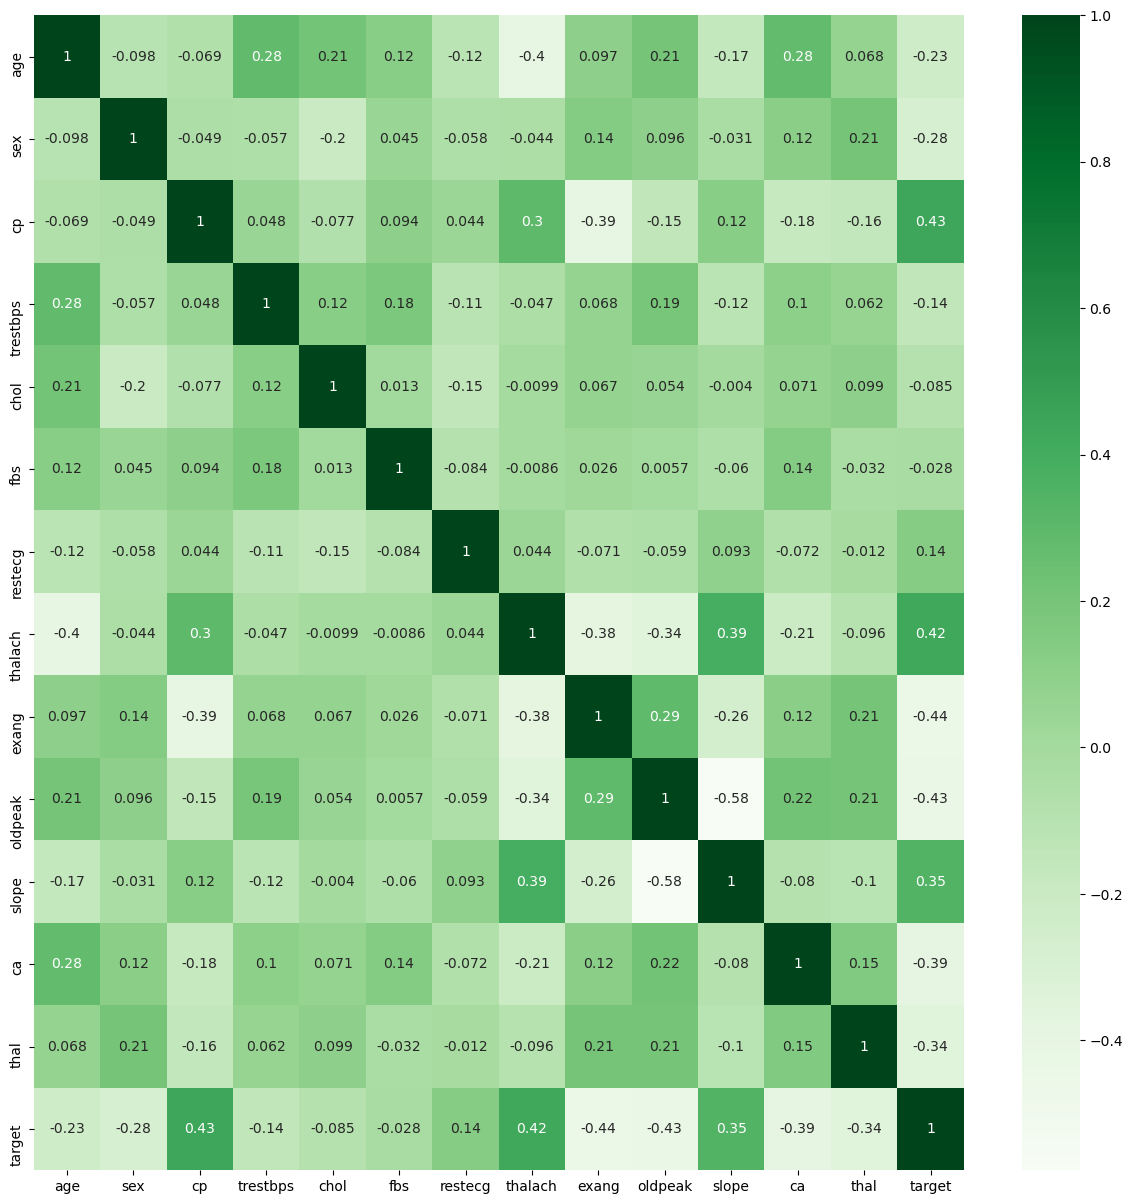

In [30]:
# Correlation using Heatmap:
plt.figure(figsize=(15,15))
sns.heatmap(heart_data.corr(), annot=True, cmap='Greens')
plt.show()

In [17]:
# Independent and Dependent Feature:
X = heart_data.iloc[:, :-1]
y = heart_data.iloc[:, -1]

In [18]:
# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(227, 13)
(76, 13)


In [19]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8289473684210527
[[24  9]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



In [21]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8421052631578947
[[26  7]
 [ 5 38]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.84      0.88      0.86        43

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [22]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8026315789473685
[[24  9]
 [ 6 37]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        33
           1       0.80      0.86      0.83        43

    accuracy                           0.80        76
   macro avg       0.80      0.79      0.80        76
weighted avg       0.80      0.80      0.80        76

